<p class='main_title'>Neural Network Raw Implementation</p>
<hr>

Data source: <a href='https://www.kaggle.com/c/digit-recognizer/data'> Kaggle MNIST Database<a>

# Imports and functions

In [424]:
# Read zip file
import zipfile
# Math operations and data manipulation
import numpy as np
import pandas as pd
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as px
import plotly.graph_objects as go
# Progress bar
from tqdm.auto import tqdm
# Temp fix for tqdm text in dark theme
from IPython.display import HTML, display

display(HTML('''
        <style>
            .jupyter-widgets {color: #d5d5d5 !important;}
            .widget-label {color: #d5d5d5 !important;}
        </style>
    '''))

In [261]:
def plot_ReLU_function():
    ticks_frequency = 1
    # Plot points
    fig, ax = plt.subplots(figsize=(5, 5))
    # Draw lines connecting points to axes
    ax.plot([-6, 0], [0, 0], c='gray', ls='-', lw=5, alpha=0.5)
    ax.arrow(0, 0, 5, 5, width=0.1, color='gray', edgecolor=None, alpha=0.5)
    # Scale coordinates
    xmin, xmax, ymin, ymax = -5, 5, -5, 5
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
    # Change spines coordinate system
    ax.spines['bottom'].set_position('zero'); ax.spines['left'].set_position('zero'); ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
    # Add X and Y labels
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03); ax.set_ylabel('y', size=14, labelpad=-21, y=1.02, rotation=0)
    # Draw grid lined up with ticks
    ax.grid(which='both', color='grey', linewidth=0.8, linestyle='-', alpha=0.2)
    ax.spines['bottom'].set_edgecolor('black'); ax.spines['left'].set_edgecolor('black'); 
    arrow_fmt = dict(markersize=10, color='black', clip_on=False)
    ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
    ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

    ax.annotate('Returns:\n\nx if x > 0    \n\n0 if x < 0', xy=(7, 2), xycoords='data', size=14, annotation_clip=False)
    plt.title('ReLU function', size=18, pad=20, loc='left')
    plt.show()

In [425]:
# Display libraries version
import session_info
session_info.show()

# Load data

## Loading dataset using `kaggle API`

In [11]:
!kaggle competitions download -c digit-recognizer

 98%|█████████████████████████████████████▏| 15.0M/15.3M [00:02<00:00, 9.43MB/s]
100%|██████████████████████████████████████| 15.3M/15.3M [00:02<00:00, 7.68MB/s]


## Reading files from zip with `pandas`

In [29]:
# Check files inside the zip
with zipfile.ZipFile('datasets/digit-recognizer.zip', 'r') as myzip:
     print(myzip.namelist())

['sample_submission.csv', 'test.csv', 'train.csv']


In [30]:
# read train/test data with pandas
with zipfile.ZipFile('datasets/digit-recognizer.zip', 'r') as myzip:
    train_df = pd.read_csv(myzip.open('train.csv'))
    test_df = pd.read_csv(myzip.open('test.csv'))

## Exploring the dataset

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [36]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


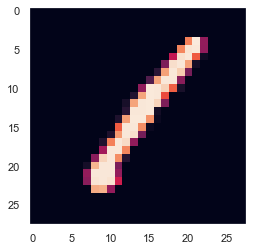

In [51]:
# Label = Number 1
label_example = train_df.iloc[0,0]
# Get only pixel columns and reshape into a 28x28 matrix
image_example = train_df.loc[0][1:].values.reshape(28,28)
# Display image
plt.imshow(image_example)
plt.grid(False);
# Thats a...

# NN Examples

## Single Neuron

Activation function:  
$a_{output}$
$=$
<font color='#fdbf11' size=5>$\sigma($</font>
$\sum$
<font color='#1696d2' size=5>$a_n$</font>
<font color='#55b748' size=5>$w_n$</font>
+
<font color='#e54096' size=5>$b$</font>
<font color='#fdbf11' size=5>$)$</font>
  
- <font color='#1696d2' size=5>$a_n$</font> input neurons  
- <font color='#55b748' size=5>$w_n$</font> neuron associated weight  
- <font color='#e54096' size=5>$b$</font> bias for the weighted sum get meaningfully active   
- <font color='#fdbf11' size=5>$\sigma(x)$</font> sigmoid (activation function)  
- $a_{output}$ neuron output  

In [667]:
# Set seed for reproducibility
np.random.seed(42)
# Define some inputs (X)
input_layer = np.random.uniform(0, 1, size=5)
# Define random weights
weights = np.random.uniform(-0.5, 0.5, size=5)
# Define a random bias value
bias = 3
# Calculate output value
output = sum(input_layer*weights) - bias
output

-3.187944804682159

Sigmoid function  
$f(x) = \sigma(x) = \frac{1}{1 + e^{-x}}  $  

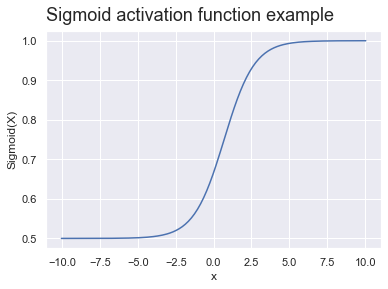

In [948]:
from scipy.special import expit # Avoids exp overflow error
sigmoid = lambda x: 1/(1 + expit(-x))
# Plot sigmoid function
x = np.linspace(-output-10, output+10, 200)
z = sigmoid(x)
plt.plot(x, z)
plt.title('Sigmoid activation function example', size=18, pad=10, loc='left')
plt.xlabel("x"); plt.ylabel("Sigmoid(X)"); plt.show()

In [669]:
# Apply sigmoid function
output = sigmoid(output)
output

0.03962190992044933

### Visualizing the Neural network

Neural network representation with 1 neuron
Inputs:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
Weights:  [-0.34400548 -0.44191639  0.36617615  0.10111501  0.20807258]
Activation function:  0.03962190992044933


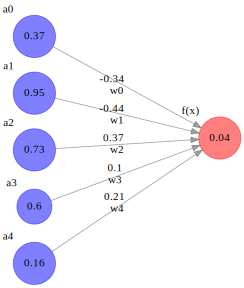

In [670]:
from graphviz import Digraph

graph = Digraph(engine='neato')
graph.attr(size='4')
# Add output node
graph.node('output', str(output.round(2)), xlabel='f(x)', color='#ff000080', style='filled', shape='circle', pos='15,-1')
# Add node for each input and it respective weight
for index, value in enumerate(input_layer):
    current_node = 'a' + str(index)
    current_weight = 'w' + str(index)
    graph.node(name=current_node, 
               label=str(value.round(2)),
               xlabel=current_node,
               color='#0000ff80', style='filled', shape='circle', pos=f'0,{-index}!')
    graph.edge(current_node, 'output',
               label=str(weights[index].round(2)),
               xlabel=current_weight,
               color='#42424280',)

print('Neural network representation with 1 neuron')
print('Inputs: ', input_layer)
print('Weights: ', weights)
print('Activation function: ', output)
graph

## Multiple neurons

<font size=5>$a^{(1)}_{0}$
$=$
<font color='#fdbf11'>$\sigma($</font>
<font color='#55b748'>$w_{0,0}$</font>
$a^{(0)}_1 + ... +  $
<font color='#55b748'>$w_{0,n}$</font>
$a^{(0)}_n + $
<font color='#1696d2'>$b_0$</font>
<font color='#fdbf11'>$)$</font>   
</font>  
Given $a^{(L)}_{i}$:  
- superscript $L$ corresponds to the layer  
- subscript $i$ corresponds to the neuron in that layer  
  

### Layers configuration

In [681]:
input_layer_size = 5
second_layer_size = 3
output_layer_size = 1

### Input layer

In [683]:
np.random.seed(42)
# Create inputs
input_layer = np.random.uniform(0, 1, size=input_layer_size)
# Create weights, 1 vector with 5 connections(from input) for each neuron in second layer(total of 3 vectors)
input_layer_weights = [np.random.uniform(-0.5, 0.5, size=input_layer_size) for index in range(second_layer_size)]
# Create biases for each neuron in the second layer
first_layer_bias = np.random.randint(1, 5, size=second_layer_size)

### Second layer

In [686]:
# Compute the actiation function for each neuron in the second layer
second_layer = [sigmoid(sum(input_layer*weights) - first_layer_bias[index]) for index, weights in enumerate(input_layer_weights)]
second_layer

[0.03962190992044933, 0.06230890666593959, 0.08628367892884775]

In [687]:
# Create weights for the second layer
second_layer_weights = [np.random.uniform(-0.5, 0.5, size=second_layer_size) for index in range(output_layer_size)]
second_layer_weights

[array([-0.45333434,  0.47375552, -0.26722866])]

In [688]:
# Create biases for each neuron in the output layer
second_layer_bias = np.random.randint(1, 5, size=second_layer_size)
second_layer_bias

array([2, 3, 2])

### Output layer

In [690]:
# Compute the actiation function for each neuron in the output layer
output_layer = [sigmoid(sum(second_layer*weights) - second_layer_bias[index]) for index, weights in enumerate(second_layer_weights)]
output_layer

[0.11800074683354274]

### Multiple NN visualization

Neural network representation with multiple neuron
Neurons from input layer:  [0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
Weights from input layer:  [array([-0.34400548, -0.44191639,  0.36617615,  0.10111501,  0.20807258]), array([-0.47941551,  0.46990985,  0.33244264, -0.28766089, -0.31817503]), array([-0.31659549, -0.19575776,  0.02475643, -0.06805498, -0.20877086])]
Neurons from second layer:  [0.03962190992044933, 0.06230890666593959, 0.08628367892884775]
Weights from second layer:  [array([-0.45333434,  0.47375552, -0.26722866])]
Neurons from output layer:  [0.11800074683354274]


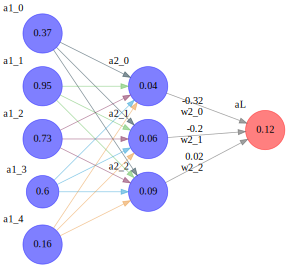

In [745]:
graph = Digraph(engine='neato')
graph.attr(size='4')

# create color gradient for weigths
color_gradient = ['#06263580', '#55b74880', '#76154880', '#1696d280', '#e88e2d80', '#0a4c6a80']

# Add output node
graph.node('output', str(output_layer[0].round(2)), xlabel='aL', color='#ff000080', style='filled', shape='circle', pos='20,-1')
# Add second layer nodes
for index, value in enumerate(second_layer):
    current_node = 'a2_' + str(index)
    current_weight = 'w2_' + str(index)
    graph.node(name=current_node, 
               label=str(value.round(2)),
               xlabel=current_node,
               color='#0000ff80', style='filled', shape='circle', pos=f'2,{-index-1}!')
    graph.edge(current_node, 'output',
               label=str(weights[index].round(2)),
               xlabel=current_weight,
               color='#42424280',)
    
# Add node for each input and it respective weight
for index_i, value in enumerate(input_layer):
    current_node = 'a1_' + str(index_i)
    current_weight = 'w1_' + str(index_i)
    graph.node(name=current_node, 
               label=str(value.round(2)),
               xlabel=current_node,
               color='#0000ff80', style='filled', shape='circle', pos=f'0,{-index_i}!')
    for index_j, value in enumerate(second_layer):
        child_node = 'a2_' + str(index_j)
        graph.edge(current_node, child_node,
                   #label=str(weights[index].round(2)),
                   #xlabel=current_weight,
                   color=color_gradient[index_i],)

print('Neural network representation with multiple neuron')
print('Neurons from input layer: ', input_layer)
print('Weights from input layer: ', input_layer_weights)
print('Neurons from second layer: ', second_layer)
print('Weights from second layer: ', second_layer_weights)
print('Neurons from output layer: ', output_layer)
graph

## Network Functions

###  Activation Functions

In [964]:
ReLU_derivative(np.array([0,1,2,3,4,5,-1,-3]))


array([False,  True,  True,  True,  True,  True, False, False])

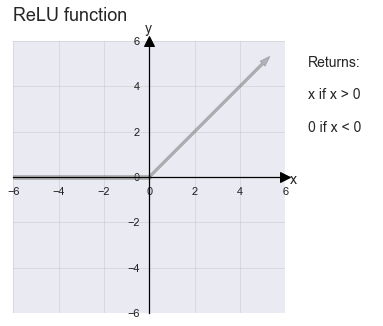

In [960]:
def ReLU(x:np.ndarray) -> np.ndarray:
    '''
    Linear function for ReLU(x)  
    Compute element-wise maximum of array elements.  
    '''
    return np.maximum(x, 0)

def ReLU_derivative(x:np.ndarray) -> np.ndarray:
    ''' Return True if x > 0, False if x < 0 '''
    return x > 0

plot_ReLU_function()

Softmax function:  
  
<p style='font-size:1.75em'>$\frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$</p>  
  
Output layer → Softmax activation function → Probabilities vector

In [967]:
def softmax(x):
    exp = expit(x - np.max(x))
    return exp / exp.sum(axis=0)

### Init Neural Network layers

In [950]:
def init_grid(grid_size:list):
    '''
    layer_size: each element of the list corresponds to the number of neurons in that layer,
    index 0 = input layer; index -1 = output layer.
    '''
    if len(grid_size) < 3:
        raise 'Grid must have at least one hidden layer.'
    
    weights_list, biases_list = [], []
    for index, layer_size in enumerate(grid_size[:-1]):
        weights_list.append(np.random.uniform(-0.5, 0.5, size=[grid_size[index+1], layer_size]) )
        biases_list.append(np.random.randint(1, 5, size=grid_size[index+1]).reshape(-1,1) )
    
    return weights_list, biases_list

### Foward Propagation

In [ ]:
np.dot()

In [ ]:
find * -size +50M | cat >> .gitignore

In [991]:
def foward_propagation(X:np.ndarray, weights:list, biases:list, act_func:any, cost_func:any, layer_grid:list):
    '''
    X : Features to be trained  
    weights: list of weights, shape[i,j], where i = number of nodes, j = number of connections  
    biases: list of biases, shape[i], where i = number of nodes  
    act_func: activation function to be used  
    cost_func: functions used to calculate the ouput cost  
    layer_grid: list containing each layer size, including input and output. 
    '''
    previous_layer = X
    # Iterate over input and all the hidden layers
    for layer_index, layer_size in enumerate(layer_grid[:-1]):
        # Compute the actiation function for each neuron in the next layer
        current_layer = act_func(weights[layer_index].dot(previous_layer) + biases[layer_index])
        # Update layer
        previous_layer = current_layer
    # Compute the cost function for each neuron in the output layer
    output_layer = cost_func(weights[-1].dot(current_layer) + biases[-1])

    return output_layer

In [994]:
# Build sample NN and test Foawrd Propagation
X_ = np.array(train_df.iloc[:,1:])             # Select data
layer_grid = [X_.shape[0], 2, 2, 2]            # Define layer grid
weights, biases = init_grid(layer_grid)        # Init random weights and biases based on grid values
foward_propagation(                            # Apply one step of foward_propagation
    X_, weights, biases, 
    ReLU, softmax, layer_grid)

array([[0.89490748, 0.89490748, 0.89490748, ..., 0.89490748, 0.89490748,
        0.89490748],
       [0.10509252, 0.10509252, 0.10509252, ..., 0.10509252, 0.10509252,
        0.10509252]])

# Creating the Neural Network

## Split data into train/test

In [346]:
# Convert from pd.DataFrame to numpy.ndarray
data = np.array(train_df)
# 42000 obervations, 1 class + 784 features
m, n = data.shape
(m, n)

(42000, 785)

In [349]:
# Shuffle the data
np.random.seed(42)
np.random.shuffle(data)

# Define train size of 80%
train_size = int(42000 * 0.8)

# Transpose data, so each image tays in columns instead of rows
# First row is the target labels, and the others is pixels 0 to 783
train_data = data[:train_size].T
test_data  = data[train_size:].T

# Train data split
X_train , y_train = train_data[1:], train_data[0]
# Test data split
X_test, y_test = test_data[1:], test_data[0]

# Scale values to range (0,1)
X_train = X_train / 255.
X_test = X_test / 255.

X_train index 0 shape:  (784,)
y_train index 0 label:  3


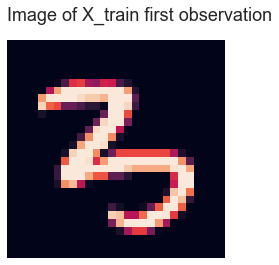

In [350]:
# Data example
print('X_train index 0 shape: ', X_train[:, 0].shape)
print('y_train index 0 label: ', y_train[0])
# Show image
plt.title('Image of X_train first observation', size=18, pad=20, loc='left')
plt.imshow(X_train[:, 0].reshape(28,28))
plt.grid(False); plt.axis(False);

## Create random weight parameters

In [355]:
def init_params():
    # Create random arrays for weights and biases
    w1 = np.random.rand(10, 784) - .5    # 784 from input and 10 for the next layer
    w2 = np.random.rand(10, 10) - 0.5    # 10 neurons for the current layer and 10 for the next
    b1 = np.random.rand(10, 1) - 0.5     # 1 bias for each neuron
    b2 = b1.copy()
    return w1, b1, w2, b2

## Define activation functions

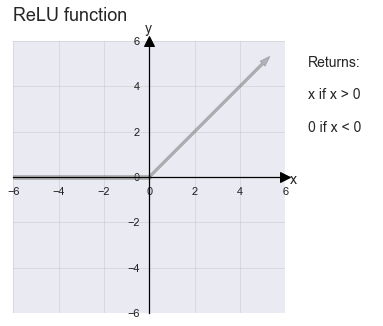

In [356]:
plot_ReLU_function()

In [408]:
def ReLU(x):
    '''
    Linear function for ReLU(x)  
    Compute element-wise maximum of array elements.  
    '''
    return np.maximum(x, 0)

def ReLU_derivative(x:np.ndarray) -> np.ndarray:
    ''' Return True if x > 0, False if x < 0 '''
    return x > 0

Softmax function:  
  
<p style='font-size:1.75em'>$\frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$</p>  
  
Output layer → Softmax activation function → Probabilities vector

In [421]:
def softmax(x):
    exp = np.exp(x - np.max(x))
    return exp / exp.sum(axis=0)

## Foward Propagation

In [818]:
def foward_propagation(w1, b1, w2, b2, X):
    # Calculate z1
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    # Calculate z2
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a1

## OneHot Encoding

In [361]:
def one_hot_encoding(X):
    n_labels = len(np.unique(X))           # Get number of labels
    encode = np.zeros((X.size, n_labels))  # Create matrix with zeros, arrays of n_labels size
    encode[np.arange(X.size), X] = 1       # Apply one hot encoding. [i,j]; i: n observations range; j: label value corresponds to onehot index
    encode = encode.T                      # Return observations from row to columns
    return encode

## Back propagation

In [418]:
def back_propagation(z1, a1, z2, a2, w2, X, y):
    # Apply one hot encoding to target
    y_enc = one_hot_encoding(y)
    # Compute layer 2
    dz2 = a2 - y_enc
    dw2 = 1 / y.size * dz2.dot(a1.T)
    db2 = 1 / y.size * np.sum(dz2)
    # Compute layer 1
    dz1 = w2.T.dot(dz2) * ReLU_derivative(z1)
    dw1 = 1 / y.size * dz1.dot(X.T)
    db1 = 1 / y.size * np.sum(dz1)
    # Return derivatives values
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha):
    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    return w1, b1, w2, b2
    

## Gradient Descent

In [ ]:
def predict(y):
    return np.argmax(y, 0)

def acc_score(predictions, true_labels):
fro    return np.sum(predictions==true_labels) / true_labels.size

In [406]:


def gradient_descent(X, y, itter, alpha, verbose=True):
    
    # Create progress bar
    pbar = tqdm(range(itter), desc='Training NN: ')
    
    w1, b1, w2, b2 = init_params()
    for i in pbar:
        # Apply foward propagation
        z1, a1, z2, a2 = foward_propagation(w1, b1, w2, b2, X)
        # Apply back propagation
        dw1, db1, dw2, db2 = back_propagation(z1, a1, z2, a2, w2, X, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, alpha)
        # Update progress bar
        pbar.set_description(f'Accuracy: {acc_score(predict(a2), y):.3f}  ')
            
    return w1, b1, w2, b2
    
    

In [819]:
w1, b1, w2, b2 = gradient_descent(X_train, y_train, itter=100, alpha=0.1)

Training NN:   0%|          | 0/100 [00:00<?, ?it/s]

/var/folders/_m/3m0bcc4n6h73gny0bt6_g4x80000gn/T/ipykernel_6638/2826461118.py:3: RuntimeWarning:

invalid value encountered in true_divide

/var/folders/_m/3m0bcc4n6h73gny0bt6_g4x80000gn/T/ipykernel_6638/2826461118.py:2: RuntimeWarning:

invalid value encountered in subtract

